In [1]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

In [2]:
# pluto_ogrio = ogr.read_dataframe("C:/Users/skyla/Downloads/pluto_by_cd/pluto_by_cd/MN/111/111.shp")
#Individual Landmark and Historic District Building Database_20240725\geo_export_fc736d2c-1b89-4f31-a4e0-0b048188b0bd.shp

To make the analysis more relatable to my colloquium project, I redo the assignment 1 to get the target data.
My system is about the color in the city, which is strongly related to the year built data. (the materials used in different era will influence the color change)
So in this file, I explore the yearbuilt data to get the input data for my colloquium project.

In [2]:
pluto_ogrio = ogr.read_dataframe("../Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp")

In [3]:
pluto_ogrio['Borough'].value_counts()

Borough
QN    324222
BK    275915
SI    125195
BX     89353
MN     42134
Name: count, dtype: int64

In [5]:
# narrow the data to manhattan 
df=pluto_ogrio[pluto_ogrio['Borough']=="MN"]
df.head()

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010 SchoolDist  \
0      MN      1   10  101  1000500  10005000003      5   1000         02   
1      MN     97   33  101  1001501  10015013007  15.01   3014         02   
2      MN     97   35  101  1001501  10015013007  15.01   3014         02   
3      MN     97   36  101  1001501  10015013007  15.01   3014         02   
4      MN     97   43  101  1001501  10015013007  15.01   3014         02   

   Council  ...  FIRM07_FLA PFIRM15_FL  Version  DCPEdited   Latitude  \
0        1  ...           1          1   24v1.1       None  40.688766   
1        1  ...           1          1   24v1.1          t  40.707789   
2        1  ...           1          1   24v1.1          t  40.707728   
3        1  ...           1          1   24v1.1          t  40.707687   
4        1  ...           1          1   24v1.1          t  40.707374   

   Longitude Notes Shape_Leng    Shape_Area  \
0 -74.018682  None        0.0  7.478663e+06   
1 -74.002009  None        0.0  2.839154e+03   
2 -74.002117  None        0.0  2.531493e+03   
3 -74.002207  None        0.0  1.825158e+03   
4 -74.002705  None        0.0  1.057095e+03   

                                            geometry  
0  POLYGON ((980898.728 191409.779, 980881.798 19...  
1  POLYGON ((983690.664 197185.709, 983700.362 19...  
2  POLYGON ((983660.178 197162.227, 983697.276 19...  
3  POLYGON ((983608.867 197131.146, 983629.531 19...  
4  POLYGON ((983498.787 196968.260, 983479.066 19...  

[5 rows x 95 columns]

In [6]:
df.reset_index(drop=True, inplace=True)

<Axes: ylabel='Frequency'>

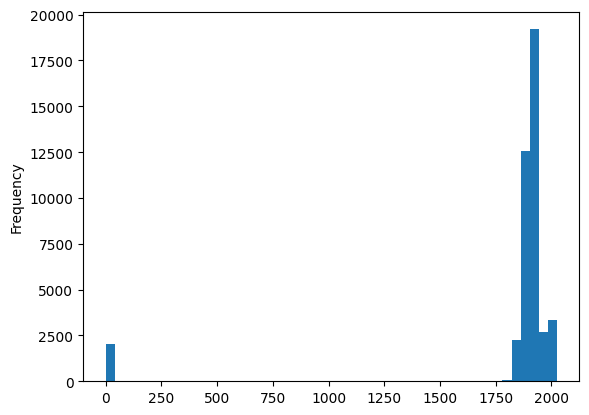

In [7]:
df["YearBuilt"].plot.hist(bins=50)

In [8]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Filter the data
df = df[(df["YearBuilt"] >= 250) & (df["YearBuilt"] <= current_year)]

# Check the cleaned data
df["YearBuilt"].describe()

count    40110.000000
mean      1915.670032
std         37.239311
min        914.000000
25%       1900.000000
50%       1910.000000
75%       1925.000000
max       2023.000000
Name: YearBuilt, dtype: float64

<Axes: ylabel='Frequency'>

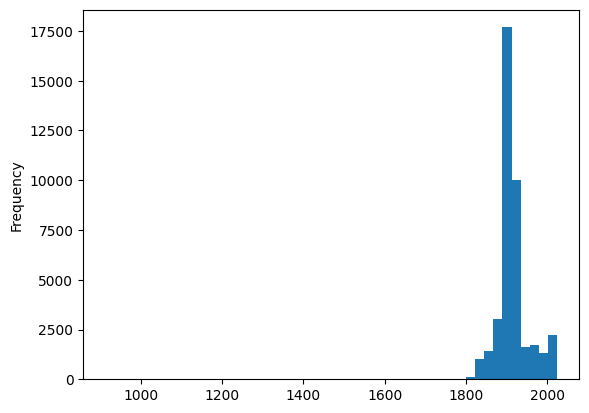

In [9]:
#make sure all of the strange data is removed
df["YearBuilt"].plot.hist(bins=50)

In [10]:
import pandas as pd
# Define the bins and labels
bins = [0, 1900, 1930, 1960, 2000, 2024]
labels = ["before 1900", "1900-1930", "1930-1960", "1960-2000", "after 2000"]
# labels = [0, 1, 2, 3,4]

# Create a new column 'YearBuiltCategory'
df["YearBin"] = pd.cut(df["YearBuilt"], bins=bins, labels=labels, right=False)

# Check the categorized data
df.head()

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010 SchoolDist  \
0      MN      1   10  101  1000500  10005000003      5   1000         02   
1      MN     97   33  101  1001501  10015013007  15.01   3014         02   
2      MN     97   35  101  1001501  10015013007  15.01   3014         02   
3      MN     97   36  101  1001501  10015013007  15.01   3014         02   
4      MN     97   43  101  1001501  10015013007  15.01   3014         02   

   Council  ...  PFIRM15_FL Version  DCPEdited   Latitude  Longitude Notes  \
0        1  ...           1  24v1.1       None  40.688766 -74.018682  None   
1        1  ...           1  24v1.1          t  40.707789 -74.002009  None   
2        1  ...           1  24v1.1          t  40.707728 -74.002117  None   
3        1  ...           1  24v1.1          t  40.707687 -74.002207  None   
4        1  ...           1  24v1.1          t  40.707374 -74.002705  None   

  Shape_Leng    Shape_Area                                           geometry  \
0        0.0  7.478663e+06  POLYGON ((980898.728 191409.779, 980881.798 19...   
1        0.0  2.839154e+03  POLYGON ((983690.664 197185.709, 983700.362 19...   
2        0.0  2.531493e+03  POLYGON ((983660.178 197162.227, 983697.276 19...   
3        0.0  1.825158e+03  POLYGON ((983608.867 197131.146, 983629.531 19...   
4        0.0  1.057095e+03  POLYGON ((983498.787 196968.260, 983479.066 19...   

       YearBin  
0    1900-1930  
1  before 1900  
2  before 1900  
3  before 1900  
4  before 1900  

[5 rows x 96 columns]

I tried two different labels (one with string ["before 1900", "1900-1930", "1930-1960", "1960-2000", "after 2000"] which is more understandable, the other is about the int number [0, 1, 2, 3,4], which i can use for grasshopper better).

So the following code will be a little bit overlapping


In [10]:
#label as [0, 1, 2, 3,4]
df['YearBin'] = df['YearBin'].astype(int)
df.YearBin.describe

<bound method NDFrame.describe of 0        1
1        0
2        0
3        0
4        0
        ..
42125    2
42126    1
42127    1
42128    3
42129    1
Name: YearBin, Length: 40110, dtype: int32>

In [11]:
df.to_csv('modified_data.csv', index=False)

In [31]:
#label as ["before 1900", "1900-1930", "1930-1960", "1960-2000", "after 2000"]
df['YearBin'] = df['YearBin'].astype(str)
df.to_file('modified_data.geojson', driver='GeoJSON')

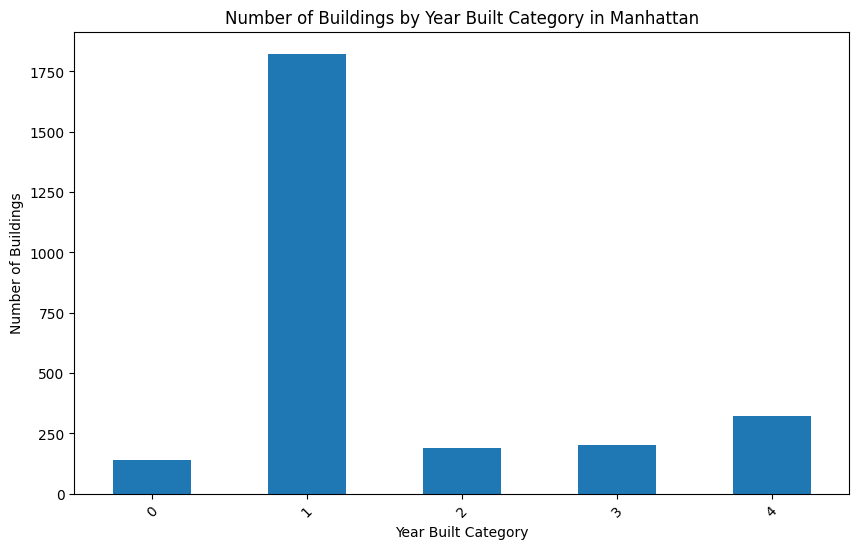

In [15]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
df["YearBin"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Buildings by Year Built Category in Manhattan")
plt.xlabel("Year Built Category")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=45)
plt.show()

I use the histogram to get the overview idea of the year built in manhattan. We can see that in manhattan, buildings built between 1900 and 1930 are the most.

In [32]:
#labels = ["before 1900", "1900-1930", "1930-1960", "1960-2000", "after 2000"]
# customize the colors displayed in map
cmap = {
    "before 1900": "#1B2727",
    "1900-1930": "#3C5148",
    "1930-1960": "#688E4E",
    "1960-2000": "#B2C582",
    "after 2000": "#D5DDDF",
}

In [33]:
df["color"] = df["YearBin"].map(cmap)

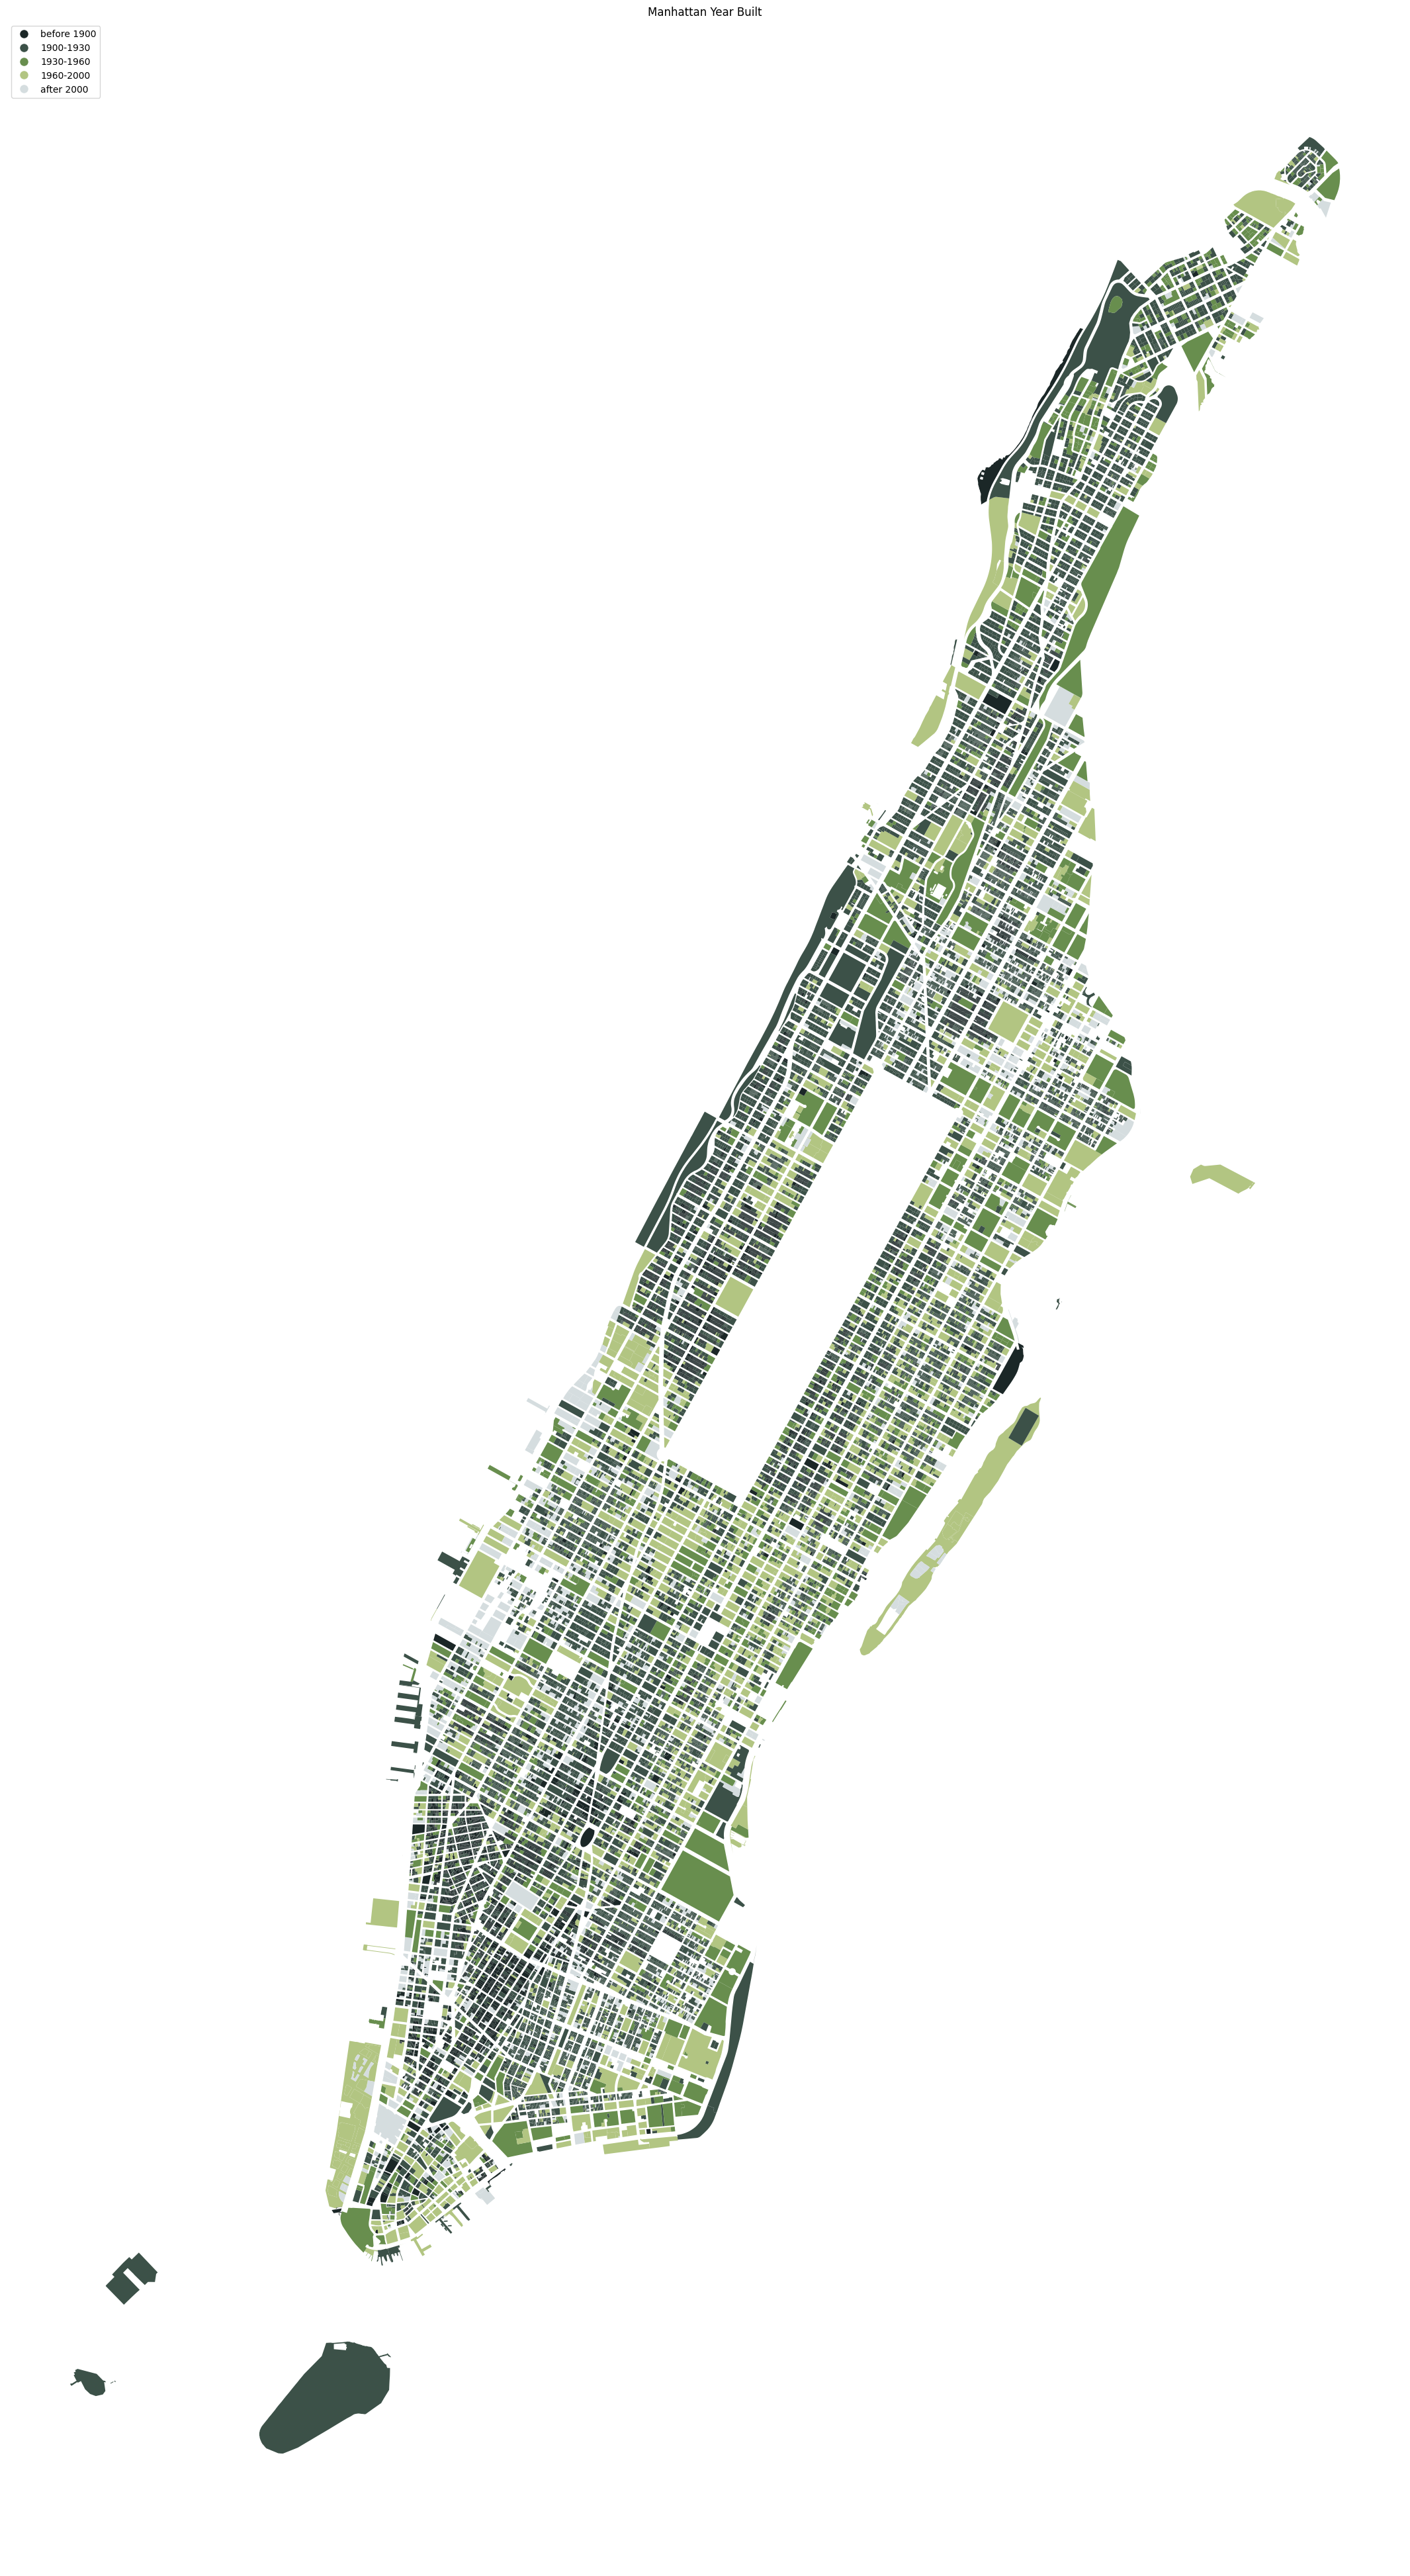

In [35]:
#visualize year bins in manhattan
ax = df.plot(
    color=df["color"],
    figsize=(50, 50),
    legend=True,
).set_axis_off()
plt.title("Manhattan Year Built")


# populate legend items based on dict from above
legend_colors = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10)
    for c in cmap.values()
]
labels = cmap.keys()
plt.legend(legend_colors, labels, loc="upper left")

In [38]:
#the same as the map above but interactive (better display on web)
import folium

df['YearBin'] = df['YearBin'].astype(str)

m = folium.Map(location=[40.7484, -73.9857], zoom_start=12)

geojson = folium.GeoJson(
    df,
    style_function=lambda feature: {
        'fillColor': feature['properties']['color'],
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(fields=["YearBin"], aliases=["Year Built:"]),
    popup=folium.GeoJsonPopup(fields=["YearBin"]),
).add_to(m)

legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 200px; height: 200px;
            border:2px solid grey; z-index:9999; font-size:14px;">
    &nbsp; <b>Year Built</b> <br>
    &nbsp; before 1900 &nbsp; <i class="fa fa-circle" style="color:#1B2727"></i><br>
    &nbsp; 1900-1930 &nbsp; <i class="fa fa-circle" style="color:#3C5148"></i><br>
    &nbsp; 1930-1960 &nbsp; <i class="fa fa-circle" style="color:#688E4E"></i><br>
    &nbsp; 1960-2000 &nbsp; <i class="fa fa-circle" style="color:#B2C582"></i><br>
    &nbsp; after 2000 &nbsp; <i class="fa fa-circle" style="color:#D5DDDF"></i>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m.save('manhattan_year_built_map.html')

m

In [12]:
# calculate diversity by how many different year-bin lots on the same block
diversity = df.groupby('Block')['YearBin'].nunique()

block_counts = df['Block'].value_counts()

# filter out the blocks with less than 20 buildings
valid_blocks = block_counts[block_counts >= 20].index
diversity = diversity[diversity.index.isin(valid_blocks)]

Block
16     3
29     3
78     3
97     5
141    4
Name: YearBin, dtype: int64

In [13]:
sorted_diversity = diversity.sort_values(ascending=False)

most_diverse = sorted_diversity.head(3)
least_diverse = sorted_diversity.tail(5)


print("3 most diverse blocks")
print(most_diverse)
print("\n5 least diverse blocks")
print(least_diverse)

3 most diverse blocks
Block
1235    5
1067    5
790     5
Name: YearBin, dtype: int64

5 least diverse blocks
Block
1746    1
2133    1
2161    1
2046    1
486     1
Name: YearBin, dtype: int64


In [17]:
gdf = gpd.GeoDataFrame(df[['Block', 'geometry']].drop_duplicates().set_index('Block'))
gdf['Diversity'] = gdf.index.map(diversity).fillna(0) 
gdf.head()

geometry  Diversity
Block                                                              
1      POLYGON ((980898.728 191409.779, 980881.798 19...        0.0
97     POLYGON ((983690.664 197185.709, 983700.362 19...        5.0
97     POLYGON ((983660.178 197162.227, 983697.276 19...        5.0
97     POLYGON ((983608.867 197131.146, 983629.531 19...        5.0
97     POLYGON ((983498.787 196968.260, 983479.066 19...        5.0

c:\Users\skyla\anaconda3\envs\python312\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


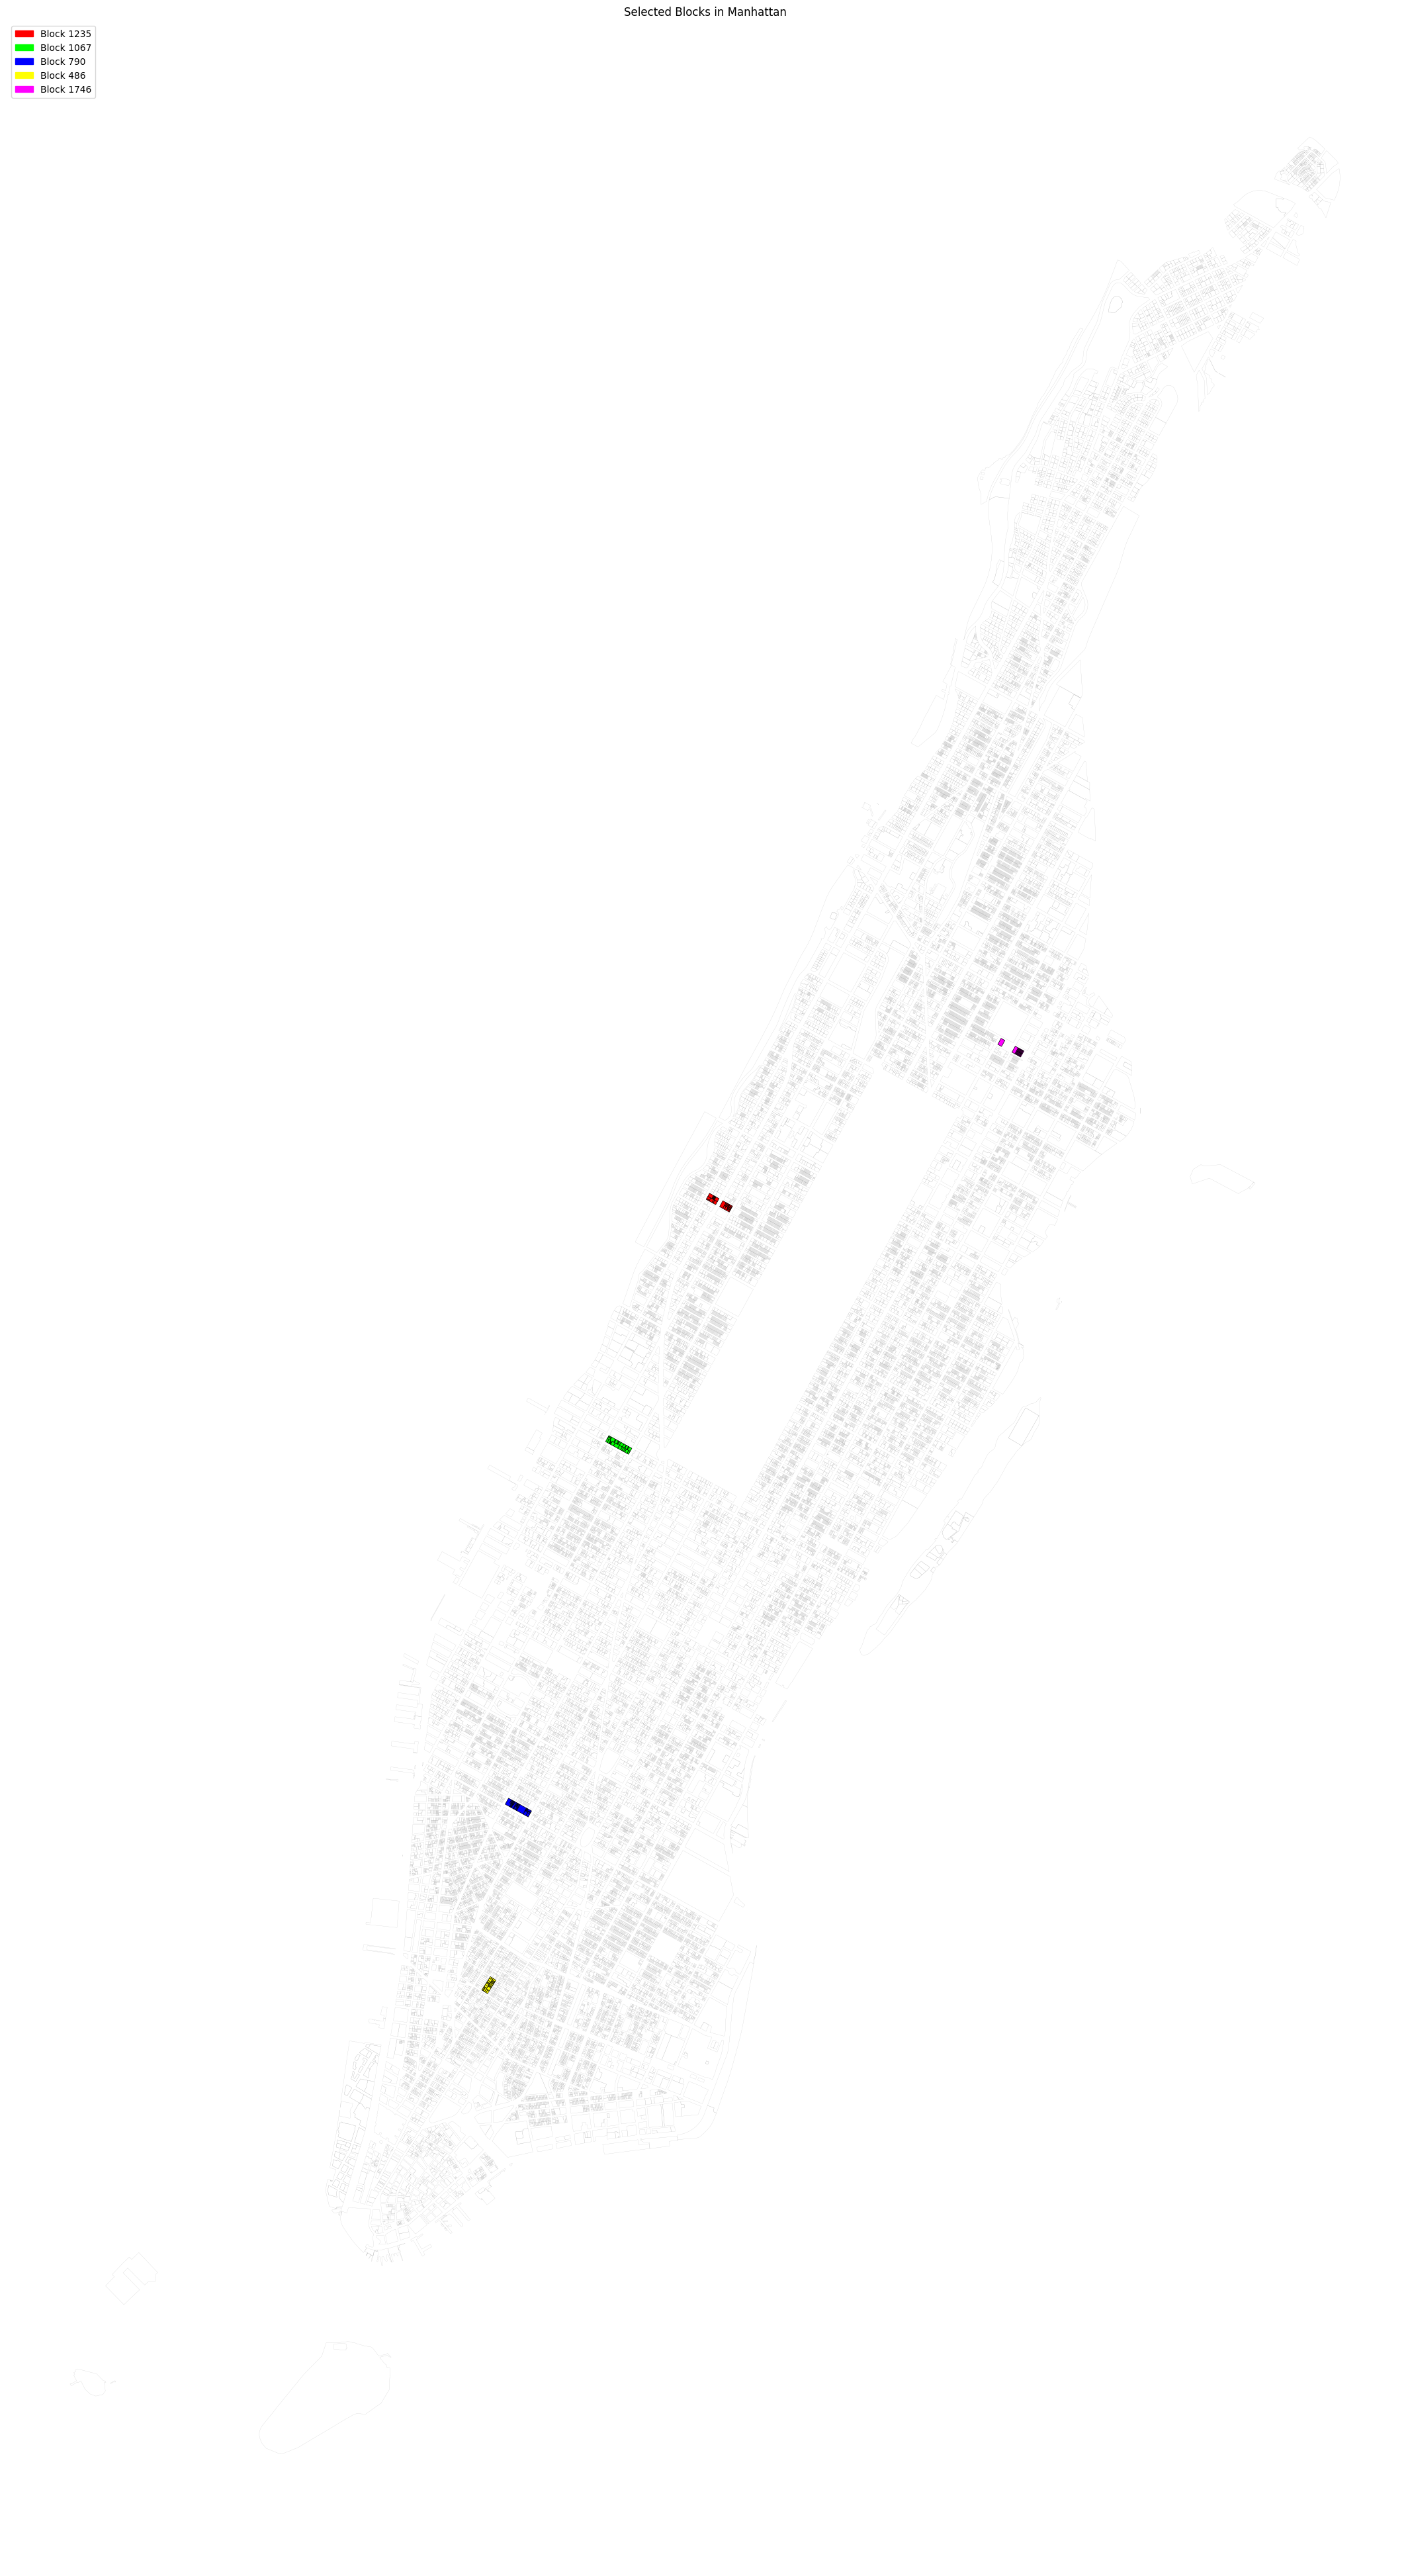

In [20]:
import matplotlib.patches as patches
#select block to investigate and visualize (selected by sorted_diversity)
target_blocks = [1235, 1067, 790, 486, 1746]

gdf_background = gpd.GeoDataFrame(gdf.copy())
gdf_background['color'] = 'white'

gdf_target = gdf[gdf.index.isin(target_blocks)]

color_map = {
    1235: '#FF0000',  # Red
    1067: '#00FF00',  # Green
    790: '#0000FF',   # Blue
    486: '#FFFF00',   # Yellow
    1746: '#FF00FF',  # Magenta
}

gdf_target['color'] = gdf_target.index.map(color_map)
gdf_background.loc[gdf_background.index.isin(target_blocks), 'color'] = 'white'

fig, ax = plt.subplots(figsize=(50, 50))

gdf_background.plot(ax=ax, color=gdf_background['color'], edgecolor='black', linewidth=0.2, alpha=0.2)  # 背景地图
gdf_target.plot(ax=ax, color=gdf_target['color'], edgecolor='black', linewidth=0.5, alpha=1.0)  # 目标街区


plt.title("Selected Blocks in Manhattan")

legend_elements = [
    patches.Patch(color=color_map[block], label=f'Block {block}')
    for block in target_blocks
]
plt.legend(handles=legend_elements, loc="upper left")

ax.set_axis_off()

plt.savefig('selected_blocks_map.png', bbox_inches='tight')

plt.show()


In [ ]:
#visualize each blocks year-built diversity 
#get interactive map (cause its too big, so i didnt run the outcome)
import folium


m = folium.Map(location=[40.7484, -73.9857], zoom_start=12)

def get_color(diversity):
    if pd.isna(diversity) or diversity == 0:
        return '#FFFFFF' 
    elif diversity < 2:
        return '#FFEDA0'
    elif diversity < 4:
        return '#FED976'
    elif diversity < 6:
        return '#FEB24C'
    else:
        return '#FD8D3C'

# import GeoJson
geojson = folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['Diversity']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(fields=['Diversity'], aliases=['Diversity:']),
).add_to(m)

# label
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 200px; height: 150px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color: white; padding: 10px;">
    &nbsp; <b>Diversity Legend</b> <br>
    &nbsp; No Data &nbsp; <i class="fa fa-circle" style="color:#FFFFFF"></i><br>
    &nbsp; Low Diversity &nbsp; <i class="fa fa-circle" style="color:#FFEDA0"></i><br>
    &nbsp; Medium-Low Diversity &nbsp; <i class="fa fa-circle" style="color:#FED976"></i><br>
    &nbsp; Medium Diversity &nbsp; <i class="fa fa-circle" style="color:#FEB24C"></i><br>
    &nbsp; High Diversity &nbsp; <i class="fa fa-circle" style="color:#FD8D3C"></i>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m.save('manhattan_diversity_map.html')

m


In [21]:

gdf.to_file("diversity.geojson", driver='GeoJSON')

In [22]:
#simplified  (to reduce the size)

from shapely.ops import transform

# Simplify geometry to reduce complexity
def simplify_geometry(geometry, tolerance=0.01):
    return geometry.simplify(tolerance, preserve_topology=True)

gdf['geometry'] = gdf['geometry'].apply(simplify_geometry)

# Save the simplified GeoJSON
gdf.to_file('simplified_data.geojson', driver='GeoJSON')

In [10]:
# Define the path to the new shapefile
output_shapefile_path = "C:/Users/skyla/Downloads/111yearbin.shp"

# Export the data to a new shapefile
df.to_file(output_shapefile_path, driver='ESRI Shapefile')

print(f"New shapefile saved at: {output_shapefile_path}")

New shapefile saved at: C:/Users/skyla/Downloads/111yearbin.shp
